In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

In [4]:
data_train = pd.read_csv("F://fashion_train.csv")

In [5]:
data_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data_test = pd.read_csv("F://fashion_test.csv")

In [8]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
training = np.array(data_train, dtype = 'float32')

In [10]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
testing = np.array(data_test, dtype = 'float32')

4.0

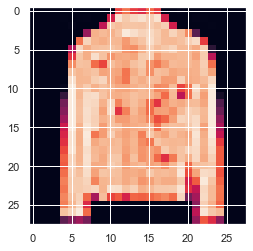

In [43]:
i = random.randint(1, 60000)
plt.imshow(training[i,1:].reshape(28, 28))
label = training[i, 0]
label

### Remember the 10 classes decoding is as follows:
1,T-shirt.
2,Trouser.
3,Dress.
4,Coat.
5,Sandal.
6,Shirt.
7,Sneaker.
8,Bag.
9,Ankle Boot.

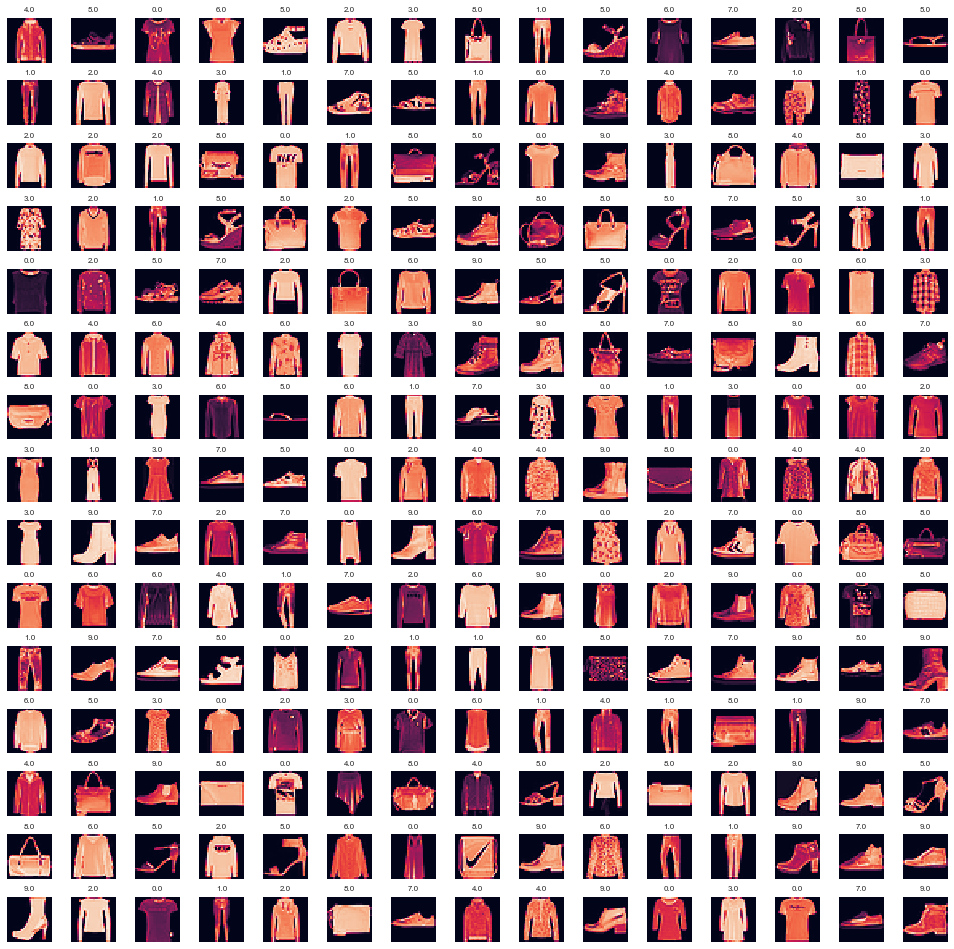

In [38]:
w_grid = 15
l_grid = 15
fig, axes = plt.subplots(l_grid, w_grid, figsize = (17, 17))
axes = axes.ravel()
n_training = len(training)
for i in np.arange(0, l_grid * w_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape(28, 28))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)


# train the model

In [50]:
x_train = training[:,1:]/255
Y_train = training[:, 0]

In [48]:
x_test = testing[:,1:]/255
y_test = testing[:,0]

In [47]:
from sklearn.model_selection import train_test_split


In [51]:
X_train, X_validate, y_train, y_validate = train_test_split(x_train, Y_train, random_state = 42, test_size = 0.2)

In [52]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [54]:
X_train.shape

(48000, 28, 28, 1)

In [60]:
#!pip install keras
#!pip install tensorflow

ERROR: Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: 'c:\\users\\acer\\anaconda3\\lib\\site-packages\\Werkzeug-1.0.0.dist-info\\METADATA'



In [63]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [64]:
cnn_model = Sequential()


In [65]:
cnn_model.add(Conv2D(32, 3, 3, input_shape= (28, 28, 1), activation = 'relu'))

In [66]:
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

In [67]:
cnn_model.add(Flatten())

In [69]:
cnn_model.add(Dense(output_dim = 32, activation = 'sigmoid'))

TypeError: __init__() missing 1 required positional argument: 'units'